<a href="https://colab.research.google.com/github/EMAT31530/ai-group-project-music-classification/blob/master/CNN%20Predict%20Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
################## Playlist Dataset Google Drive Link (also in Google Drive of ai.music.generation@gmail.com ) ########################
https://drive.google.com/drive/folders/18it5Kuzlo5OPvcxvOxrve-7-bl9t4XeE?usp=sharing

SyntaxError: ignored

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import shutil
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array
import random
from google.colab import files

In [4]:
########### Load Trained Model - Doesn't seem to load properly ############
model = load_model("/content/drive/MyDrive/CNN")
#model = tf.keras.models.load_model('/content/drive/MyDrive/json_model/model2')
#model.compile(optimizer = Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
data_gen=tf.keras.preprocessing.image.ImageDataGenerator()
path='/content/drive/MyDrive/playlist/images' 
image_datagentest=data_gen.flow_from_directory(path,target_size=(300,300), shuffle = False, class_mode='categorical')

Found 290 images belonging to 29 classes.


In [6]:
path = '/content/drive/MyDrive/spectrograms3secXX/test'
genres = [f.name for f in os.scandir(path) if f.is_dir()]
genres

['metal',
 'disco',
 'pop',
 'blues',
 'reggae',
 'classical',
 'rock',
 'country',
 'hiphop',
 'jazz']

In [7]:
path = '/content/drive/MyDrive/playlist/images'
list_subfolders_with_paths = [f.path for f in os.scandir(path) if f.is_dir()]
list_subfolder_name_with_paths = [f.name for f in os.scandir(path) if f.is_dir()]
list_subfolders_with_paths
list_subfolder_name_with_paths

['Corpse Pose',
 'All Along the Watchtower',
 'LEAVING HELL',
 'Love and or Hate Trigger',
 'Dsco',
 'Diary of a Rose',
 'Abusey Junction',
 'Circuits',
 'Like a Buoy',
 'George Street',
 'Strings of Light',
 'Suede',
 'All Caps',
 'Send Me',
 'Peanuts Grow Underground',
 'Blue in Green (feat. John Coltrane & Bill Evans)',
 'We Are Family',
 'Oblivion',
 'Slow (Loud)',
 'Track X',
 'Dark blue',
 'Bullet With a Name',
 'Wake Up',
 'Time',
 "Job's Lament",
 'Poison Tree',
 'A Message to You Rudy - 2002 Remaster',
 'Dirty Old Town',
 'Pressure Drop']

In [8]:
def predict(track_name,model):
  track_path = os.path.join(path, track_name)
  #os.remove(os.path.join(path,'.DS_Store'))
  num_files = len([name for name in os.listdir(track_path) if os.path.isfile(os.path.join(track_path, name))])
  prediction = np.zeros((num_files,10))
  i = 0
  #image = image_data.resize((288,432))
  for file_name in os.listdir(track_path):
    if not file_name == ".DS_Store":
      #print(file_name)
      file_path = os.path.join(path, track_name, file_name)
      image_data = load_img(file_path,color_mode = 'rgb' ,target_size=(128,130))
      image = img_to_array(image_data)

      image = np.reshape(image,(1,128,130,3))

      prediction[i,:] = model.predict(image, verbose=1)#/255)  #.reshape((10,)) 

      #prediction = prediction.reshape((10,)) 

    i += 1


  predict_avg = np.average(prediction, axis=0)
  predict_avg = np.around(predict_avg, decimals = 4)
  genre_class = np.argmax(predict_avg)




  
  return track_name, genre_class, predict_avg

In [9]:
path = '/content/drive/MyDrive/playlist/images'
list_subfolders_with_paths = [f.path for f in os.scandir(path) if f.is_dir()]
list_subfolders_name_with_paths = [f.name for f in os.scandir(path) if f.is_dir()]
list_subfolders_with_paths
list_subfolders_name_with_paths

num_entries = len(list_subfolders_with_paths)
  
track_name_list = []
genre_class_list = np.zeros(num_entries)
predict_avg_list = np.zeros((num_entries,10))
#predict_avg_array = np.zeros((,10))
i = 0
for subdir in os.listdir(path):
  #print(subdir)
  if not subdir == ".DS_Store":
      track_name, genre_class, predict_avg = predict(subdir,model)
      print(track_name, genre_class, predict_avg)
      track_name_list.append(track_name)
      genre_class_list[i] = (genre_class)
      predict_avg_list[i,:]=predict_avg
      print()
      i+=1
      
      

  

1/1 [==============================] - 0s 26ms/step
Corpse Pose 9 [1.200e-03 6.740e-02 0.000e+00 1.739e-01 1.000e-04 0.000e+00 5.900e-03
 8.840e-02 1.000e-04 6.629e-01]

1/1 [==============================] - 0s 21ms/step
All Along the Watchtower 9 [7.310e-02 1.600e-03 2.933e-01 3.360e-02 1.000e-04 7.350e-02 5.000e-04
 3.030e-02 7.000e-04 4.934e-01]

1/1 [==============================] - 0s 25ms/step
LEAVING HELL 3 [0.000e+00 0.000e+00 2.864e-01 4.507e-01 0.000e+00 0.000e+00 0.000e+00
 1.000e-04 2.555e-01 7.300e-03]

1/1 [==============================] - 0s 36ms/step


KeyboardInterrupt: ignored

In [ ]:
########## Predict and Add Results to a Dataframe ################
playlist_predictions = pd.DataFrame(predict_avg_list, index = list_subfolders_name_with_paths, columns=sorted(genres))


In [ ]:
genre_class_list_words = genre_class_list
for j in range(len(genres)):
  genre = sorted(genres)[j]  
  genre_class_list_words = [genre if j==i else i for i in genre_class_list_words]

  genre_class_list_words

In [ ]:
playlist_predictions['Predicted Genre'] = genre_class_list_words

In [ ]:
cols = list(playlist_predictions)
cols.insert(0, cols.pop(cols.index('Predicted Genre')))
playlist_predictions = playlist_predictions.loc[:, cols]

In [ ]:
playlist_predictions

In [ ]:
playlist_predictions.to_csv('predictions.csv')
files.download('predictions.csv')

In [ ]:
################################Test Data Confidence Matrix#########################################

In [10]:
#path = '/content/drive/MyDrive/playlist/images'
path = '/content/drive/MyDrive/spectrograms3secXX/test'
list_subfolders_with_paths = [f.path for f in os.scandir(path) if f.is_dir()]
list_subfolders_name_with_paths = [f.name for f in os.scandir(path) if f.is_dir()]
list_subfolders_with_paths
list_subfolders_name_with_paths

num_entries = len(list_subfolders_name_with_paths)# if os.path.isfile(os.path.join(track_path, name))])
  

In [11]:
genres = list_subfolders_name_with_paths

In [12]:

track_name_list = []
genre_class_list = np.zeros(num_entries)
predict_avg_list = np.zeros((num_entries,10))
#predict_avg_array = np.zeros((,10))
i = 0
for subdir in os.listdir(path):
  #print(subdir)
  if not subdir == ".DS_Store":
      track_name, genre_class, predict_avg = predict(subdir,model)
      print(track_name, genre_class, predict_avg)
      track_name_list.append(track_name)
      genre_class_list[i] = (genre_class)
      predict_avg_list[i,:]=predict_avg
      print()
      i+=1
      
      

  

1/1 [==============================] - 0s 22ms/step
metal 6 [4.370e-02 0.000e+00 3.000e-04 4.700e-03 1.160e-02 1.000e-04 8.111e-01
 0.000e+00 0.000e+00 1.284e-01]

1/1 [==============================] - 0s 27ms/step
disco 3 [1.410e-02 9.800e-03 2.300e-03 9.527e-01 6.000e-04 0.000e+00 0.000e+00
 2.000e-04 1.420e-02 6.200e-03]

1/1 [==============================] - 0s 29ms/step
pop 7 [0.     0.0015 0.0104 0.0133 0.0063 0.0096 0.     0.9379 0.0077 0.0134]

1/1 [==============================] - 0s 31ms/step
blues 0 [0.9686 0.     0.0031 0.     0.     0.0068 0.     0.     0.0044 0.0071]

1/1 [==============================] - 0s 19ms/step
reggae 8 [3.000e-04 0.000e+00 2.000e-04 5.500e-03 2.000e-03 0.000e+00 0.000e+00
 0.000e+00 9.815e-01 1.040e-02]

1/1 [==============================] - 0s 22ms/step
classical 1 [0.000e+00 9.987e-01 1.000e-04 0.000e+00 0.000e+00 1.100e-03 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]

1/1 [==============================] - 0s 20ms/step
rock 9 [3.300e-03 3.000

In [13]:
conf_matrix = pd.DataFrame(predict_avg_list, index = list_subfolders_name_with_paths, columns=sorted(list_subfolders_name_with_paths))


In [14]:
conf_matrix

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
metal,0.0437,0.0000,0.0003,0.0047,0.0116,0.0001,0.8111,0.0000,0.0000,0.1284
disco,0.0141,0.0098,0.0023,0.9527,0.0006,0.0000,0.0000,0.0002,0.0142,0.0062
pop,0.0000,0.0015,0.0104,0.0133,0.0063,0.0096,0.0000,0.9379,0.0077,0.0134
blues,0.9686,0.0000,0.0031,0.0000,0.0000,0.0068,0.0000,0.0000,0.0044,0.0071
reggae,0.0003,0.0000,0.0002,0.0055,0.0020,0.0000,0.0000,0.0000,0.9815,0.0104
classical,0.0000,0.9987,0.0001,0.0000,0.0000,0.0011,0.0000,0.0000,0.0000,0.0000
rock,0.0033,0.0003,0.0043,0.0003,0.0017,0.0011,0.0034,0.0000,0.0002,0.9854
country,0.0165,0.0002,0.9699,0.0007,0.0000,0.0008,0.0000,0.0000,0.0000,0.0119
hiphop,0.0252,0.0000,0.0065,0.0003,0.9522,0.0008,0.0000,0.0001,0.0140,0.0010
jazz,0.0020,0.0116,0.0008,0.0000,0.0000,0.9852,0.0000,0.0000,0.0000,0.0003


In [15]:
conf_matrix=conf_matrix.sort_index(ascending=True)

In [18]:
conf_matrix

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,0.9686,0.0000,0.0031,0.0000,0.0000,0.0068,0.0000,0.0000,0.0044,0.0071
classical,0.0000,0.9987,0.0001,0.0000,0.0000,0.0011,0.0000,0.0000,0.0000,0.0000
country,0.0165,0.0002,0.9699,0.0007,0.0000,0.0008,0.0000,0.0000,0.0000,0.0119
disco,0.0141,0.0098,0.0023,0.9527,0.0006,0.0000,0.0000,0.0002,0.0142,0.0062
hiphop,0.0252,0.0000,0.0065,0.0003,0.9522,0.0008,0.0000,0.0001,0.0140,0.0010
jazz,0.0020,0.0116,0.0008,0.0000,0.0000,0.9852,0.0000,0.0000,0.0000,0.0003
metal,0.0437,0.0000,0.0003,0.0047,0.0116,0.0001,0.8111,0.0000,0.0000,0.1284
pop,0.0000,0.0015,0.0104,0.0133,0.0063,0.0096,0.0000,0.9379,0.0077,0.0134
reggae,0.0003,0.0000,0.0002,0.0055,0.0020,0.0000,0.0000,0.0000,0.9815,0.0104
rock,0.0033,0.0003,0.0043,0.0003,0.0017,0.0011,0.0034,0.0000,0.0002,0.9854


In [20]:
scaled_conf_matrix =conf_matrix * 100

In [22]:
scaled_conf_matrix= scaled_conf_matrix.round(1)

In [ ]:
##############Colour Map ##################
import matplotlib.pyplot as plt

import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = conf_matrix_row.style.background_gradient(cmap=cm)
s


In [24]:
scaled_conf_matrix

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,96.9,0.0,0.3,0.0,0.0,0.7,0.0,0.0,0.4,0.7
classical,0.0,99.9,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
country,1.6,0.0,97.0,0.1,0.0,0.1,0.0,0.0,0.0,1.2
disco,1.4,1.0,0.2,95.3,0.1,0.0,0.0,0.0,1.4,0.6
hiphop,2.5,0.0,0.6,0.0,95.2,0.1,0.0,0.0,1.4,0.1
jazz,0.2,1.2,0.1,0.0,0.0,98.5,0.0,0.0,0.0,0.0
metal,4.4,0.0,0.0,0.5,1.2,0.0,81.1,0.0,0.0,12.8
pop,0.0,0.2,1.0,1.3,0.6,1.0,0.0,93.8,0.8,1.3
reggae,0.0,0.0,0.0,0.5,0.2,0.0,0.0,0.0,98.2,1.0
rock,0.3,0.0,0.4,0.0,0.2,0.1,0.3,0.0,0.0,98.5


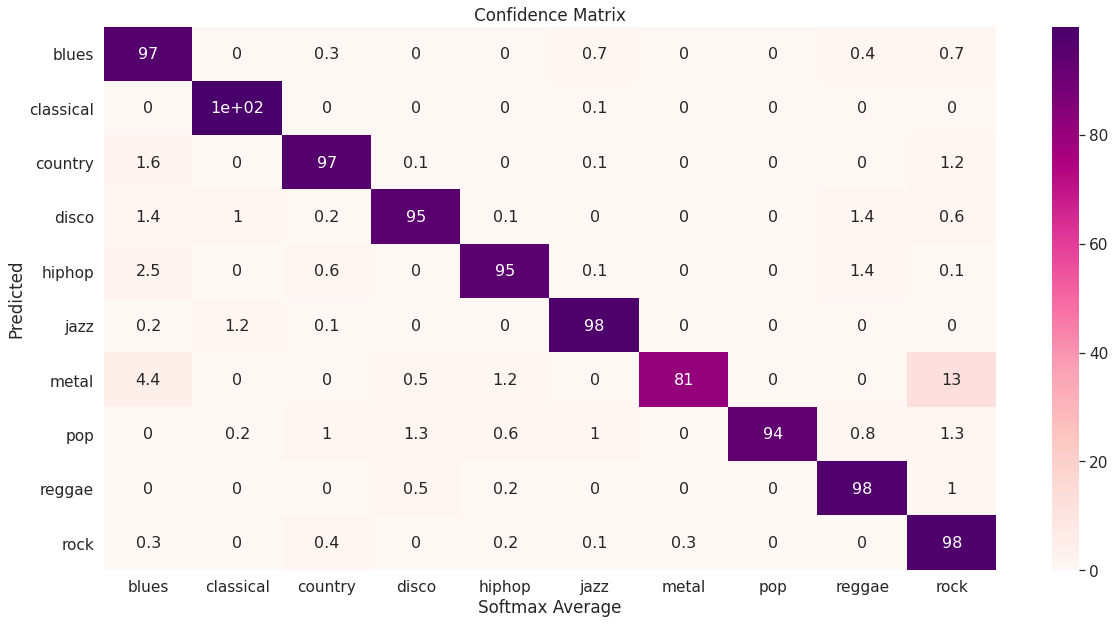

In [32]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'
genres = genres.split()

#CF = confusion_matrix(truelabel, pred)
CF = scaled_conf_matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(CF, index = [g for g in genres], columns = [g for g in genres])
plt.figure( figsize=(20,10))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, cmap="RdPu",annot_kws={"size": 16})

plt.title('Confidence Matrix')
plt.xlabel('Softmax Average')
plt.ylabel('Predicted')
plt.savefig('/content/drive/MyDrive/Confidence_Matrix.png')

In [29]:
plt.figure

<function matplotlib.pyplot.figure>

In [ ]:
###################### Download colour map as Image - Not yet Completed ################################

In [ ]:
pip install dataframe_image

In [ ]:
!apt install chromium-chromedriver

In [ ]:
chrome_path =  "/usr/bin/chromedriver"

In [ ]:
import numpy as np
import pandas as pd
import dataframe_image as dfi


dfi.export(s, 'conf_matrix.png')

In [ ]:
plt.savefig('conf_mat.png')

In [ ]:
html = s.render()

In [ ]:
Html_file= open("conf_mat_html","w")
Html_file.write(html)
Html_file.close()

In [ ]:
pip install wkhtmltopdf

In [ ]:
pip install imgkit

In [ ]:
import imgkit
imgkit.from_string(html, 'conf_mat.png')

In [ ]:
 
df_tracks = pd.DataFrame({'track_name':track_name_list,'genre_class':genre_class_list,})#'predict_avg':predict_avg_list})
print(df_tracks.shape)
df_tracks.head()

#arr = df_tracks['predict_avg'].to_numpy()

np.stack(arr).astype(None)

In [ ]:
df_tracks = pd.DataFrame({'track_name':track_name_list,'genre_class':genre_class_list,'predict_avg':predict_avg_list})
print(df_tracks.shape)
df_tracks.head()

In [ ]:
df_tracks

In [ ]:
df_tracks

In [ ]:
#################Straight into dataframe ##########################
#path = '/content/drive/MyDrive/playlist/images'
path = '/content/drive/MyDrive/spectrograms3secXX/test'
list_subfolders_with_paths = [f.path for f in os.scandir(path) if f.is_dir()]
list_subfolders = [f.name for f in os.scandir(path) if f.is_dir()]
list_subfolders_with_paths
list_subfolders

num_entries = len(list_subfolders_name_with_paths)# if os.path.isfile(os.path.join(track_path, name))])

df = pd.DataFrame(index=list_subfolders, columns=list_subfolders)
df = df.fillna(0) # with 0s rather than NaNs


track_name_list = []
genre_class_list = np.zeros(num_entries)
predict_avg_list = np.zeros((num_entries,10))
#predict_avg_array = np.zeros((,10))
i = 0
for subdir in os.listdir(path):
  #print(subdir)
  if not subdir == ".DS_Store":
      track_name, genre_class, predict_avg = predict(subdir,model)
      print(track_name, genre_class, predict_avg)
      df[track_name,:] = predict_avg
      #track_name_list.append(track_name)
      #genre_class_list[i] = (genre_class)
      #predict_avg_list[i,:]=predict_avg
      #print()
      #i+=1